# Titanic Project

**The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy  import stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing the DataSet

In [2]:
df=pd.read_csv('Titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Getting the Basic outlook over the data

In [6]:
df.shape

(891, 12)

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
#df['PassengerId']

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observations:
    
    1.The name has nothing to do with datatset, so we can remove this.

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:
    
    We can drop cabin column because out of 891 rows 687 rows are blank.

Comments:
    
    1.Lets remove those unwanted columns like Name, Ticket, PassengerID,Cabin

# Making of precise dataset

In [3]:
df=df.drop(['PassengerId','Cabin','Name'],axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [28]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df['Sex'].replace(['female','male'],[0,1],inplace=True)

In [6]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [32]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [38]:
#k=sns.load_dataset('titanic')

In [48]:
#k.head()

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0.0
1,1,1,0,38.0,1,0,PC 17599,71.2833,1.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,1,1,0,35.0,1,0,113803,53.1000,0.0
4,0,3,1,35.0,0,0,373450,8.0500,0.0


In [94]:
#k['embark_town'].value_counts()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Ticket']=le.fit_transform(df['Ticket'])

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,0.0
1,1,1,0,38.0,1,0,596,71.2833,1.0
2,1,3,0,26.0,0,0,669,7.9250,0.0
3,1,1,0,35.0,1,0,49,53.1000,0.0
4,0,3,1,35.0,0,0,472,8.0500,0.0


<AxesSubplot:>

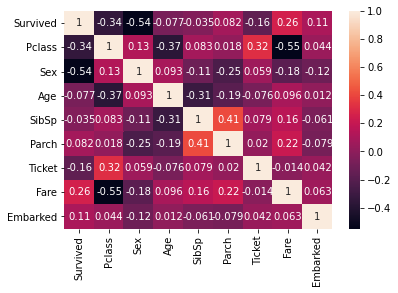

In [44]:
sns.heatmap(df.corr(),annot=True)

Observations:
    
    1.No need to remove ticket its quite significant.

# EDA

# 1.Univariate Analysis

In [45]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

**1.Survived**

<AxesSubplot:xlabel='Survived', ylabel='count'>

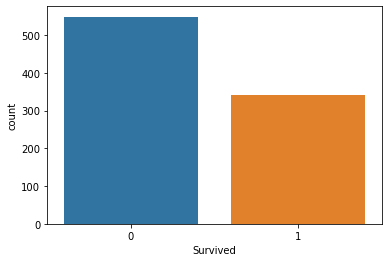

In [46]:
sns.countplot(df['Survived'])

Observations:
    
      1.We can clearly see that the number of people survived is more than half of the number of people died    

**2.Pclass**

In [49]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Observations:
    
    1.There were more people on class 3.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

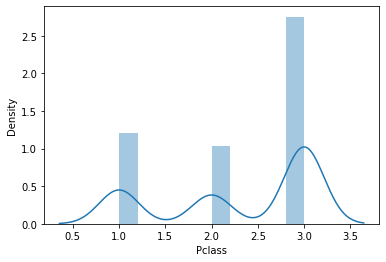

In [50]:
sns.distplot(df['Pclass'],kde=True)

<AxesSubplot:xlabel='Pclass'>

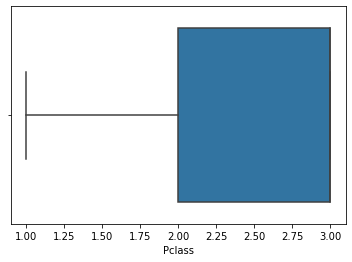

In [51]:
sns.boxplot(df['Pclass'])

Observations:
    
    1.Since its an catagorical no proble, no outliers even.

**3.Sex**

In [52]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Observations:
    
    1.There were more males than females  in the ship.

<AxesSubplot:xlabel='Sex', ylabel='count'>

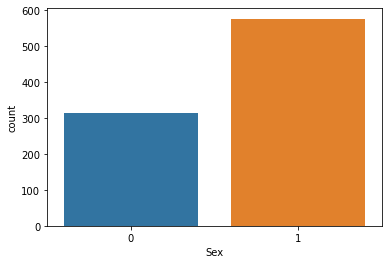

In [53]:
sns.countplot(df['Sex'])

**4.Age**

In [63]:
children=df.loc[df['Age']<17]

In [64]:
children.count()

Survived    100
Pclass      100
Sex         100
Age         100
SibSp       100
Parch       100
Ticket      100
Fare        100
Embarked    100
dtype: int64

Observations:
    
    1.If you consider those people under aged 17 as children then we can say that there were 100 children.

In [65]:
middle17_35=df.loc[(df['Age']>17) & (df['Age']<35)]

In [66]:
middle17_35.count()

Survived    366
Pclass      366
Sex         366
Age         366
SibSp       366
Parch       366
Ticket      366
Fare        366
Embarked    366
dtype: int64

Observations:
    
    1.There were 366 people between the age 17 to 35.

In [67]:
middle35_50=df.loc[(df['Age']>35) & (df['Age']<50)]

In [68]:
middle35_50.count()

Survived    143
Pclass      143
Sex         143
Age         143
SibSp       143
Parch       143
Ticket      143
Fare        143
Embarked    142
dtype: int64

Observations:
    
    1.There were 143 people between the age 35 to 50.

In [69]:
oldage=df.loc[(df['Age']>50)]

In [71]:
oldage.count()

Survived    64
Pclass      64
Sex         64
Age         64
SibSp       64
Parch       64
Ticket      64
Fare        64
Embarked    63
dtype: int64

Observations:
    
    1.There were 64 people who were more than 50 years of age.

<AxesSubplot:xlabel='Age', ylabel='Density'>

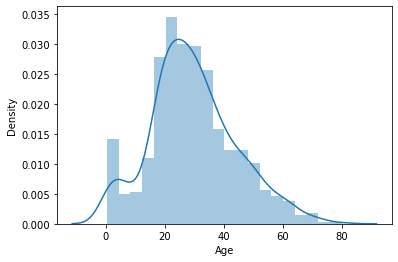

In [72]:
sns.distplot(df['Age'])

Observations:
    
    1.24 is the age catagory where 30 people fall.

<AxesSubplot:xlabel='Age'>

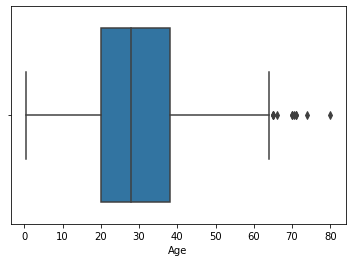

In [74]:
sns.boxplot(df['Age'])

Observations:
    
    1.There are few outliers.

**5.Sibsp**

In [76]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Observations:
    
    1.Most of the people who boarded have zero number of Siblings/Spouses Aboard.
    

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

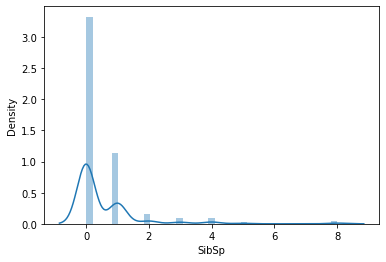

In [77]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='SibSp'>

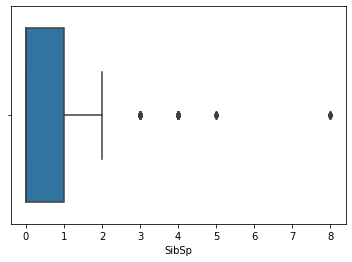

In [78]:
sns.boxplot(df['SibSp'])

Observations:
    
    1.There were few ooutliers.

**6.Ticket**

In [79]:
df['Ticket'].describe()

count    891.000000
mean     338.528620
std      200.850657
min        0.000000
25%      158.500000
50%      337.000000
75%      519.500000
max      680.000000
Name: Ticket, dtype: float64

In [80]:
df['Ticket'].value_counts()

568    7
80     7
333    7
337    6
566    6
249    6
621    5
480    5
194    4
95     4
610    4
83     4
329    4
395    4
33     4
574    4
676    4
37     4
488    4
155    3
634    3
556    3
237    3
613    3
571    3
588    3
608    3
423    3
307    3
469    3
587    3
344    3
135    3
416    3
141    3
0      3
561    3
71     3
1      3
113    3
53     2
453    2
49     2
51     2
444    2
441    2
435    2
432    2
417    2
420    2
457    2
54     2
59     2
377    2
64     2
67     2
454    2
459    2
458    2
519    2
558    2
2      2
7      2
551    2
548    2
28     2
536    2
32     2
72     2
504    2
495    2
36     2
486    2
43     2
476    2
47     2
331    2
117    2
132    2
162    2
187    2
186    2
180    2
176    2
170    2
166    2
164    2
106    2
189    2
158    2
150    2
144    2
142    2
114    2
139    2
115    2
188    2
193    2
81     2
92     2
302    2
252    2
84     2
89     2
91     2
247    2
240    2
93     2
562    2
233    2
226    2
2

In [83]:
df['Fare'].sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
118    247.5208
716    227.5250
557    227.5250
380    227.5250
700    227.5250
527    221.7792
377    211.5000
689    211.3375
730    211.3375
779    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
297    151.5500
305    151.5500
498    151.5500
708    151.5500
31     146.5208
195    146.5208
373    135.6333
325    135.6333
269    135.6333
319    134.5000
337    134.5000
660    133.6500
334    133.6500
390    120.0000
435    120.0000
802    120.0000
763    120.0000
659    113.2750
393    113.2750
215    113.2750
306    110.8833
698    110.8833
550    110.8833
581    110.8833
505    108.9000
307    108.9000
544    106.4250
537    106.4250
520     93.5000
820     93.5000
484     91.0792
291     91.0792
245     90.0000
412     90.0000
486     90.0000
224     90.0000
453     89.1042
849     

In [84]:
df.iloc[678:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
678,0,3,0,43.00,1,6,566,46.9000,0.0
679,1,1,1,36.00,0,1,608,512.3292,1.0
680,0,3,0,NaN,0,0,281,8.1375,2.0
681,1,1,1,27.00,0,0,587,76.7292,1.0
682,0,3,1,20.00,0,0,500,9.2250,0.0
683,0,3,1,14.00,5,2,566,46.9000,0.0
684,0,2,1,60.00,1,1,240,39.0000,0.0
685,0,2,1,25.00,1,2,634,41.5792,1.0
686,0,3,1,14.00,4,1,249,39.6875,0.0
687,0,3,1,19.00,0,0,372,10.1708,0.0


Observations:
    
    1.The 1st class has highest fare ,the highest fare recorded is 512.

<AxesSubplot:>

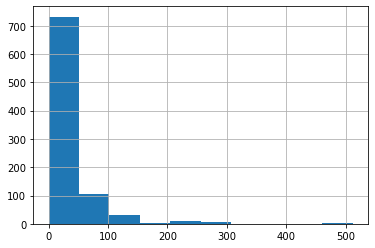

In [86]:
df['Fare'].hist(grid=True)

Observations:
    
    1.Most of the fare were between 0 to 50.

<AxesSubplot:xlabel='Fare'>

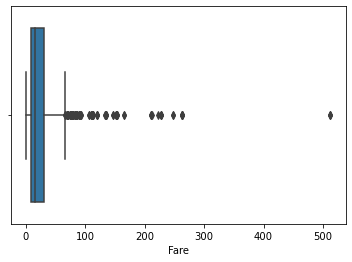

In [88]:
sns.boxplot(df['Fare'])

Observations:
    
    1.There were few outliers.

**7.Embarked**

In [91]:
df['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [95]:
k['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Observations:
    
    1.From the above data we can see that most of the people embarked from the first place Southampton.

# Multivariate Analysis

In [97]:
from heatmap import heatmap,corrplot

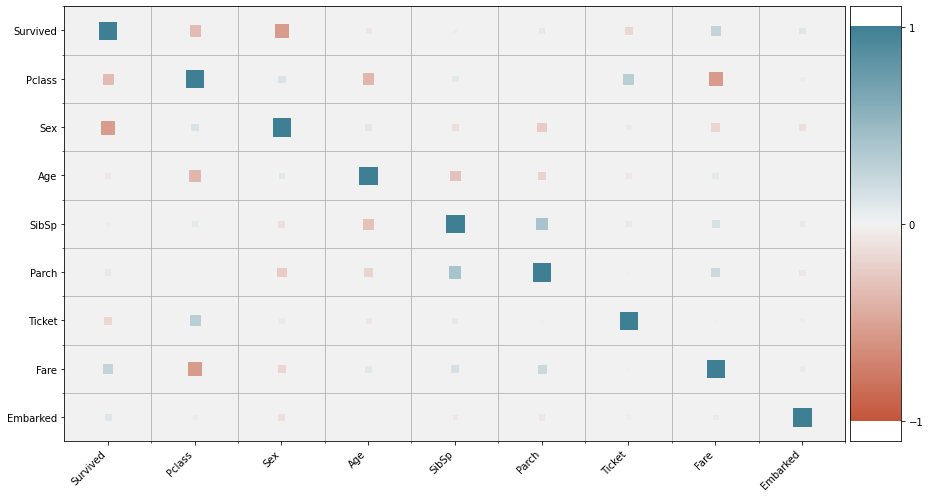

In [99]:
plt.figure(figsize=(15,8))
corrplot(df.corr(),size_scale=300)
plt.show()

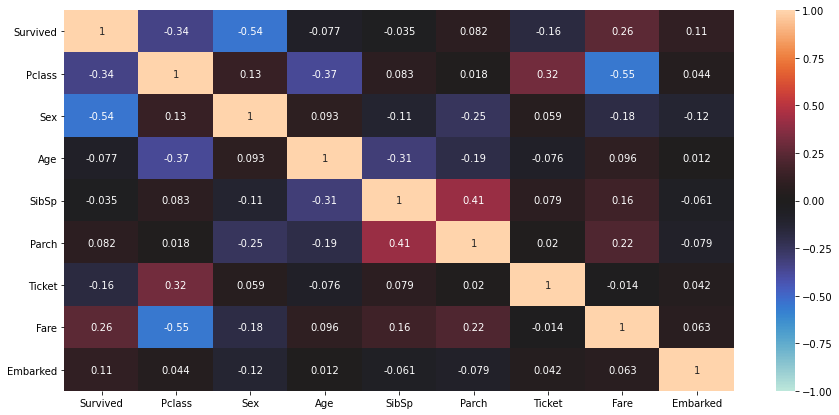

In [100]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.The columns Pclass, Sex,Fare,Ticket have significant affect over a person will be live or not.
    2.There are some columns between which there is significant.
        1.Pclass vs Fare
        2.Pclass vs Age
        3.Sex vs Parch
        4.Age vs SibSp
        5.Age vs Parch
        6.Parch vs Sex
        7.SibSp vs Parch

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [102]:
#Multivariate analysis by grouping

In [12]:
Target=df.groupby(df['Survived'])

In [13]:
live=Target.get_group(1)

In [14]:
dead=Target.get_group(0)

In [15]:
live.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,342.0,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000,342.000000,340.00000
mean,1.0,1.950292,0.318713,28.343690,0.473684,0.464912,296.678363,48.395408,0.45000
std,0.0,0.863321,0.466660,14.950952,0.708688,0.771712,218.165402,66.596998,0.65209
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,1.000000,0.000000,19.000000,0.000000,0.000000,94.250000,12.475000,0.00000
50%,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,235.000000,26.000000,0.00000
75%,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,539.000000,57.000000,1.00000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,680.000000,512.329200,2.00000


In [109]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [111]:
live['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

Observations:
    
    1.From the above data we can say that 63% people who belonged to first class,47% who belonged to 2nd class and 24% of third class  got survived.
    

In [112]:
live['Sex'].value_counts()

0    233
1    109
Name: Sex, dtype: int64

Observations:
    
    1.Out of total 342 people survived,69% of survived is womans and remaining is men.

<AxesSubplot:>

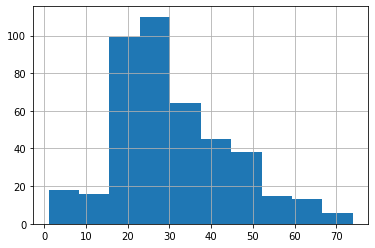

In [114]:
dead['Age'].hist(grid=True)

Observations:
    
    1.Most of the people who died were belonged to age group between 17 to 30.

In [117]:
live['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [118]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [120]:
live.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,342.0,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000,342.000000,340.00000
mean,1.0,1.950292,0.318713,28.343690,0.473684,0.464912,296.678363,48.395408,0.45000
std,0.0,0.863321,0.466660,14.950952,0.708688,0.771712,218.165402,66.596998,0.65209
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,1.000000,0.000000,19.000000,0.000000,0.000000,94.250000,12.475000,0.00000
50%,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,235.000000,26.000000,0.00000
75%,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,539.000000,57.000000,1.00000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,680.000000,512.329200,2.00000


In [121]:
dead.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,549.0,549.000000,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,0.852459,30.626179,0.553734,0.329690,364.599271,22.117887,0.307832
std,0.0,0.735805,0.354968,14.172110,1.288399,0.823166,184.732277,31.388207,0.620478
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,2.000000,1.000000,21.000000,0.000000,0.000000,221.000000,7.854200,0.000000
50%,0.0,3.000000,1.000000,28.000000,0.000000,0.000000,370.000000,10.500000,0.000000
75%,0.0,3.000000,1.000000,39.000000,1.000000,0.000000,518.000000,26.000000,0.000000
max,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,680.000000,263.000000,2.000000


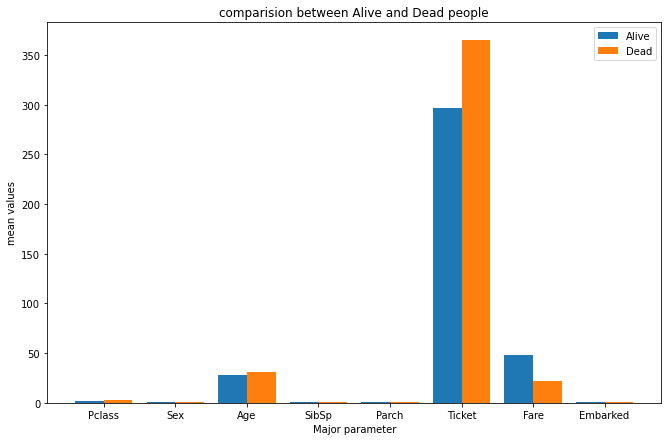

In [122]:
X =['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
yp = [1.950292,0.318713,28.343690,0.473684,0.464912,296.678363,48.395408,0.45000]
yq = [2.531876,0.852459,30.626179,0.553734,0.329690,364.599271,22.117887,0.307832]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'Alive')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Dead')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision between Alive and Dead people")
plt.legend()
plt.show()

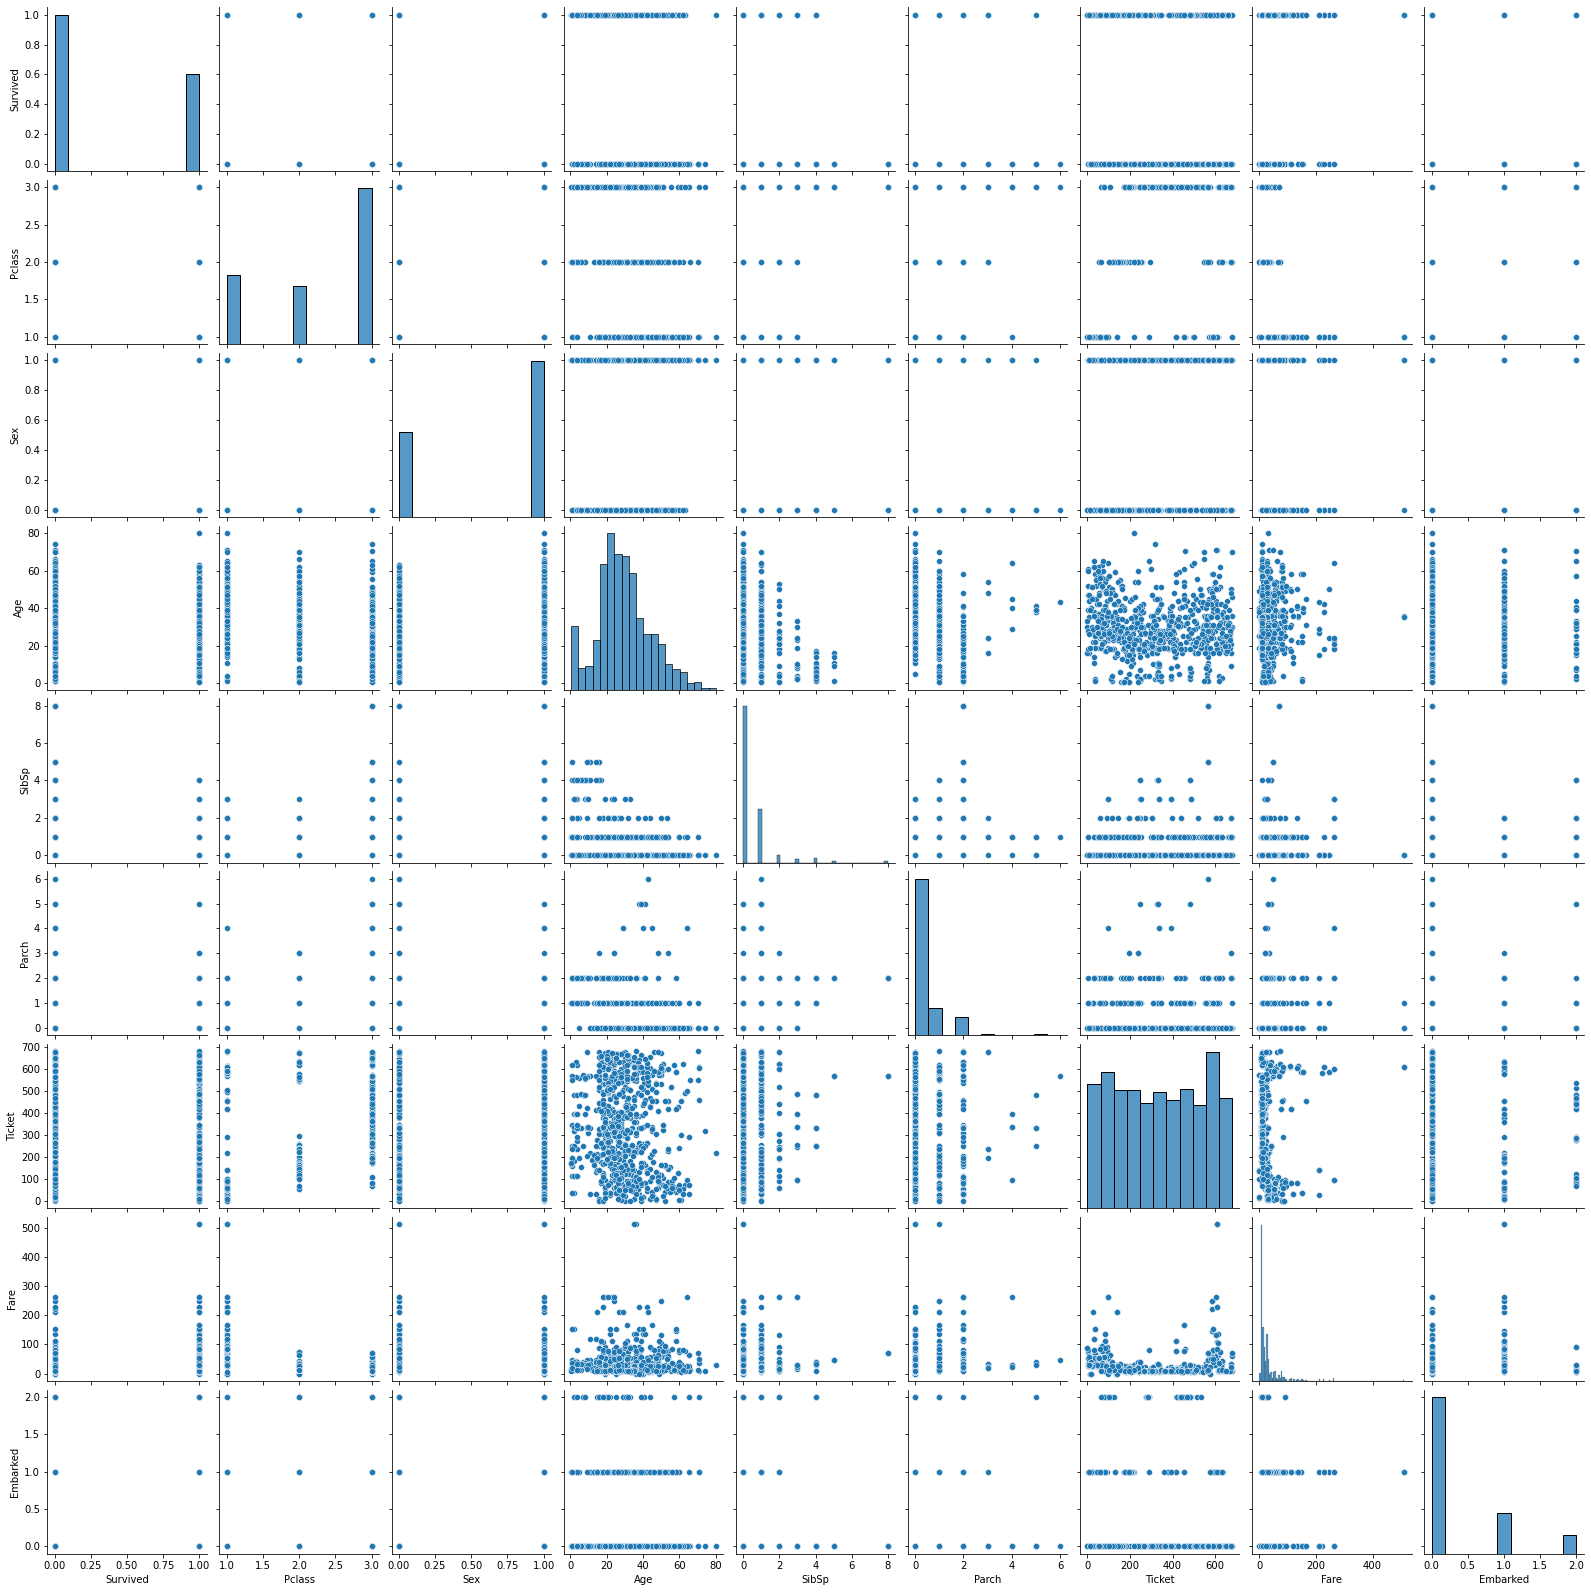

In [119]:
sns.pairplot(df)

# Bi variate analysis

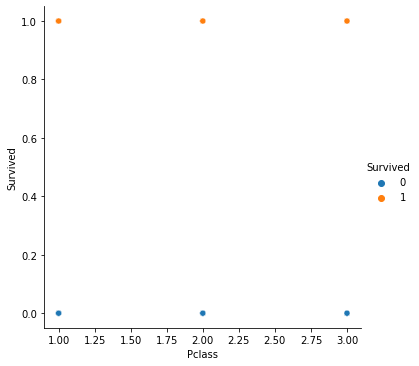

In [123]:
sns.relplot(x='Pclass',y='Survived',hue='Survived',data=df)

Observations:
    
    1.We already know that 1.From the above data we can say that 63% people who belonged to first class,47% who belonged to 2nd class and 24% of third class  got survived.

<AxesSubplot:xlabel='Sex', ylabel='count'>

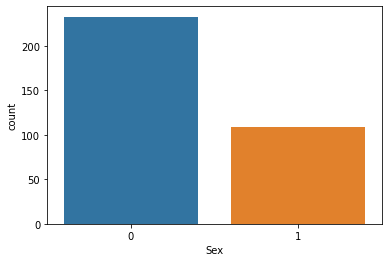

In [125]:
sns.countplot(live['Sex'])

In [126]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [127]:
live['Sex'].value_counts()

0    233
1    109
Name: Sex, dtype: int64

Observations:
    
    1.74% of the womans were survived and only 18% of mens got survived.

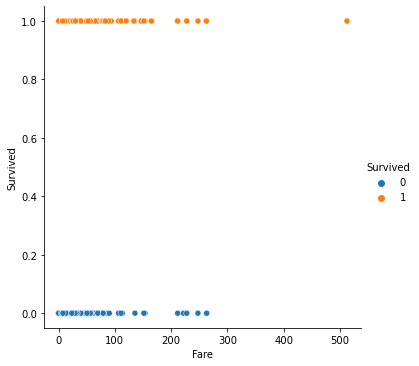

In [131]:
sns.relplot(x='Fare',y='Survived',hue='Survived',data=df)

Observations:
    
    1.There were not much significant observations.

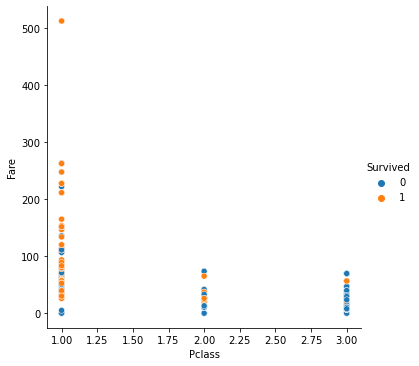

In [132]:
sns.relplot(x='Pclass',y='Fare',hue='Survived',data=df)

Observations:
    
    1.Most of the people who were survived belongs to 1st class.

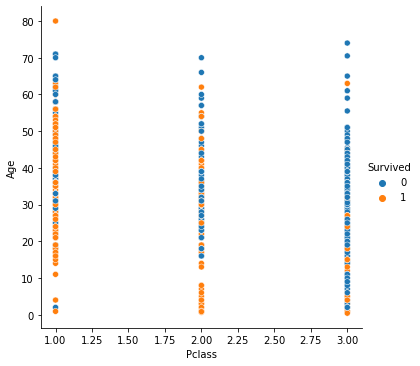

In [133]:
sns.relplot(x='Pclass',y='Age',hue='Survived',data=df)

Observations:
    
    1.From the above observations we can see children belonged to class 1 and 2 under the age 10 got survived.

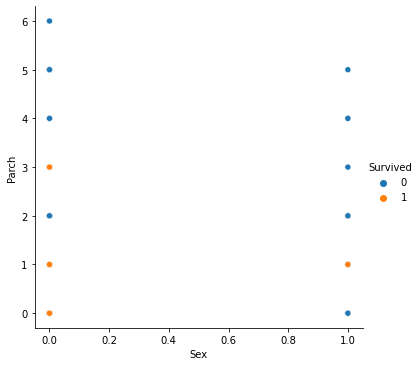

In [16]:
sns.relplot(x='Sex',y='Parch',hue='Survived',data=df)

Observations:
    
    1.We can clearly see that for the value of the parch 1 there is no death .

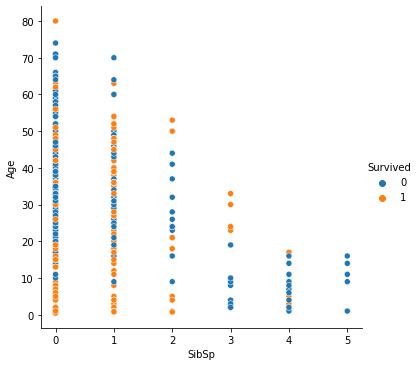

In [17]:
sns.relplot(x='SibSp',y='Age',hue='Survived',data=df)

Observations:
    
    1.No significant observations.

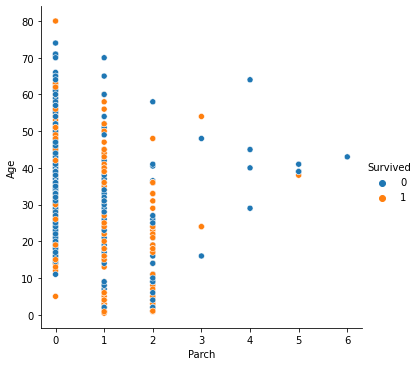

In [21]:
sns.relplot(x='Parch',y='Age',hue='Survived',data=df)

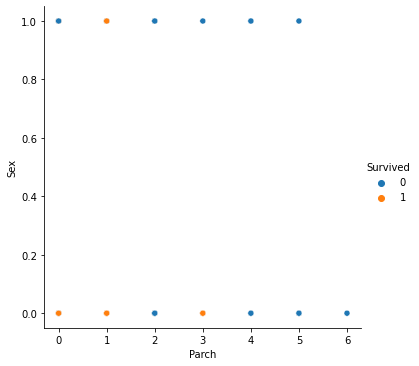

In [22]:
sns.relplot(x='Parch',y='Sex',hue='Survived',data=df)

Observations:
    
    1.Womans belonged to parch 0,1 and 3 were alive

# Cleaning the data

In [23]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

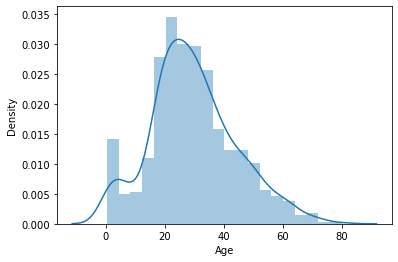

In [25]:
sns.distplot(df['Age'])

In [28]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [30]:
df['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [33]:
df['Embarked'].fillna(0,inplace=True)

In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Removing the Outliers

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df))

In [40]:
threshold=3
dfz=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-dfz.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.07968574635241302


# Splitting the variables

In [41]:
x=dfz.drop('Survived',axis=1)

In [42]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,0.0
1,1,0,38.0,1,0,596,71.2833,1.0
2,3,0,26.0,0,0,669,7.9250,0.0
3,1,0,35.0,1,0,49,53.1000,0.0
4,3,1,35.0,0,0,472,8.0500,0.0


In [43]:
y=dfz['Survived']

In [44]:
x.shape

(820, 8)

In [45]:
y.shape

(820,)

# Skewness removal

In [46]:
x.skew()

Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Ticket      0.039240
Fare        2.318761
Embarked    1.552592
dtype: float64

Observations:
    
    1.Except Ticket and Age every other variable should be treated for skewness.

In [47]:
#lets find the best method for skewness
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [50]:
skee(x['Pclass'])

original skewness is: -0.6322423392231357


-0.7495251621323258


-0.8678163428344764


-0.47045908306404327




In [49]:
from scipy.stats import boxcox

In [52]:
x['Pclass']=stats.boxcox(x['Pclass'])[0]

In [63]:
x['Sex']=np.cbrt(x['Sex'])

In [71]:
x['SibSp']=np.cbrt(x['SibSp'])

In [85]:
x['Parch']=np.cbrt(x['Parch'])

In [89]:
x['Fare']=np.cbrt(x['Fare'])

In [95]:
x['Embarked']=np.cbrt(x['Embarked'])

In [96]:
x.skew()

Pclass     -0.471322
Sex        -0.664152
Age         0.401952
SibSp       1.018770
Parch       1.643259
Ticket      0.039240
Fare        0.708623
Embarked    1.079646
dtype: float64

In [103]:
x['Sex']=np.sqrt(x['Sex'])

In [106]:
x['SibSp']=np.cbrt(x['SibSp'])

In [110]:
x['Parch']=np.cbrt(x['Parch'])

In [115]:
x['Embarked']=np.sqrt(x['Embarked'])

# Building the model

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=43)

In [120]:
#Finding the best random_state
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [121]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8518518518518519 on random state 14


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=14)

In [123]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (631, 8)


x_test shape is : (189, 8)


y_train shape is : (631,)


y_test shape is : (189,)


In [131]:
#Logistic  Regression
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.852
[[98  9]
 [19 63]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.88      0.77      0.82        82

    accuracy                           0.85       189
   macro avg       0.86      0.84      0.85       189
weighted avg       0.85      0.85      0.85       189



In [132]:
#GaussianNB
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.836
[[94 13]
 [18 64]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.83      0.78      0.81        82

    accuracy                           0.84       189
   macro avg       0.84      0.83      0.83       189
weighted avg       0.84      0.84      0.84       189



In [133]:
#svc
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.683
[[97 10]
 [50 32]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       107
           1       0.76      0.39      0.52        82

    accuracy                           0.68       189
   macro avg       0.71      0.65      0.64       189
weighted avg       0.70      0.68      0.66       189



In [134]:
#dtc
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.804
[[89 18]
 [19 63]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.78      0.77      0.77        82

    accuracy                           0.80       189
   macro avg       0.80      0.80      0.80       189
weighted avg       0.80      0.80      0.80       189



In [135]:
#knn
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.651
[[87 20]
 [46 36]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       107
           1       0.64      0.44      0.52        82

    accuracy                           0.65       189
   macro avg       0.65      0.63      0.62       189
weighted avg       0.65      0.65      0.64       189



In [136]:
#add
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.884
[[101   6]
 [ 16  66]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       107
           1       0.92      0.80      0.86        82

    accuracy                           0.88       189
   macro avg       0.89      0.87      0.88       189
weighted avg       0.89      0.88      0.88       189



In [141]:
#rf
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.889
[[101   6]
 [ 15  67]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       107
           1       0.92      0.82      0.86        82

    accuracy                           0.89       189
   macro avg       0.89      0.88      0.89       189
weighted avg       0.89      0.89      0.89       189



# Cross Validation Score

In [147]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')


LogisticRegression() score is:
0.788


GaussianNB() score is:
0.782


SVC() score is:
0.661


DecisionTreeClassifier() score is:
0.783


KNeighborsClassifier() score is:
0.648


AdaBoostClassifier() score is:
0.821


RandomForestClassifier() score is:
0.827




Observations:
    
    Difference between accuracy and cross val score
    1.Logistic Regression:0.064
    2.GNB                :0.054
    3.SVC                :0.022
    4.DTC                :0.021
    5.KNN                :0.003
    6.Add                :0.063
    7.RF                 :0.062
    since knn has the least difference I will opt for knn

# Hyper parameter tuning

In [149]:
grid_param={
    
    'n_neighbors':[6,7,8,5],
    'weights' :['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

gd_sr=GridSearchCV(estimator=knn,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
0.6621951219512195


In [151]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='auto')

In [152]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.704
[[92 15]
 [41 41]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       107
           1       0.73      0.50      0.59        82

    accuracy                           0.70       189
   macro avg       0.71      0.68      0.68       189
weighted avg       0.71      0.70      0.69       189



**The maximum accuracy score we got without any over fitting problems is 0.704**

# Saving the model

In [153]:
import joblib
joblib.dump(knn,'knntitanic.obj')

['knntitanic.obj']